In [2]:
import networkx as nx
from cdt.causality.graph import PC
from cdt.data import load_dataset
import matplotlib.pyplot as plt

# Dataset of flow cytometry, real data, 11 variables x 7466 samples; 
# Sachs, K., Perez, O., Pe'er, D., Lauffenburger, D. A., & Nolan,
# G. P. (2005). Causal protein-signaling networks derived from
# multiparameter single-cell data. Science, 308(5721), 523-529.
data, graph = load_dataset("sachs")


Detecting 1 CUDA device(s).


In [3]:
## Raw data

print(data.head(5))
data.to_csv("teste.csv")

   praf  pmek   plcg   PIP2   PIP3  p44/42  pakts473    PKA    PKC   P38  pjnk
0  26.4  13.2   8.82  18.30  58.80    6.61      17.0  414.0  17.00  44.9  40.0
1  35.9  16.5  12.30  16.80   8.13   18.60      32.5  352.0   3.37  16.5  61.5
2  59.4  44.1  14.60  10.20  13.00   14.90      32.5  403.0  11.40  31.9  19.5
3  73.0  82.8  23.10  13.50   1.29    5.83      11.8  528.0  13.70  28.6  23.1
4  33.7  19.8   5.19   9.73  24.80   21.10      46.1  305.0   4.66  25.7  81.3


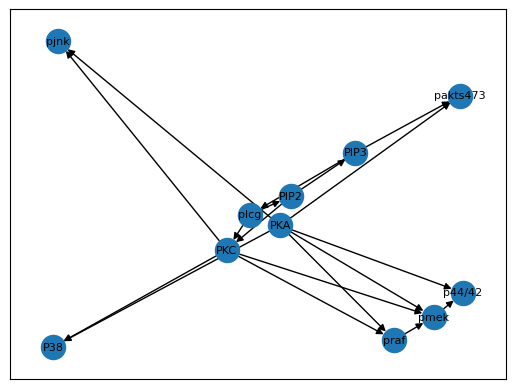

In [3]:
## Raw graph

nx.draw_networkx(graph, font_size=8)
plt.show()

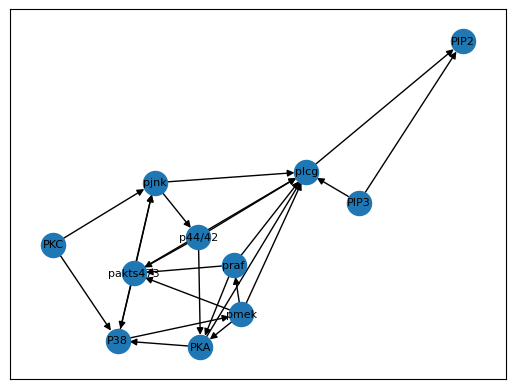

In [4]:
## PC processing

obj = PC()
#The predict() method works without a graph, or with a directed or undirected graph provided as an input

output = obj.predict(data)    #No graph provided as an argument
#output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
#output = obj.predict(data, graph)  #With a directed graph

#To view the graph created, run the below commands:
nx.draw_networkx(output, font_size=8)
plt.show()

In [10]:
## Creates random matrix

import numpy as np
import pandas as pd
#df = pd.DataFrame(np.random.randint(0,7400,size=(7400, 15)), columns=list('ABCDEFGHIJKLKMN'))
df = pd.DataFrame(np.random.rand(7400,15), columns=list('ABCDEFGHIJKLKMN'))
print(df)

             A         B         C         D         E         F         G  \
0     0.723838  0.425595  0.244303  0.650864  0.516682  0.704040  0.293508   
1     0.429589  0.640193  0.228822  0.328100  0.522993  0.870349  0.927509   
2     0.560101  0.674235  0.841901  0.536721  0.115447  0.595899  0.151369   
3     0.637489  0.462943  0.171052  0.276128  0.202822  0.688191  0.481444   
4     0.447887  0.373624  0.835708  0.163774  0.092199  0.450065  0.712463   
...        ...       ...       ...       ...       ...       ...       ...   
7395  0.722164  0.483509  0.696756  0.145346  0.726490  0.794386  0.328934   
7396  0.211017  0.098350  0.730943  0.186068  0.874194  0.118457  0.341440   
7397  0.622775  0.628721  0.510711  0.625142  0.525728  0.984779  0.497042   
7398  0.656956  0.197922  0.495164  0.101177  0.930232  0.226789  0.356077   
7399  0.221407  0.774482  0.350752  0.566282  0.944212  0.154385  0.025837   

             H         I         J         K         L         

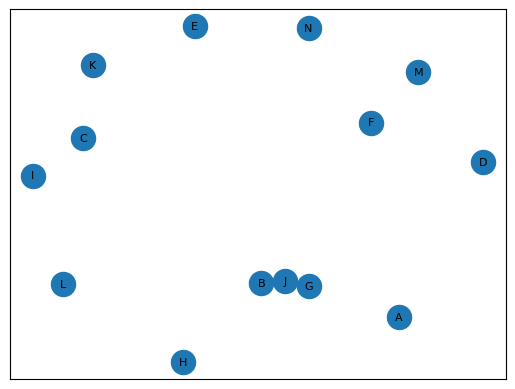

In [12]:
## Uses PC in the new graph

obj = PC()
#The predict() method works without a graph, or with a directed or undirected graph provided as an input

output = obj.predict(df)    #No graph provided as an argument
#output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
#output = obj.predict(data, graph)  #With a directed graph

#To view the graph created, run the below commands:
nx.draw_networkx(output, font_size=8)
plt.show()